# Natural Language processing - Basic Text Processing

## Prerequisites for this course
1. Basic Python Programming 
2. Basic Python Libraries
3. Webscraping basics using beautiful soup<br>

Incase you do not have the necessary knowledge of these topics kindly check out our Refactored.ai course on the same:
1. [Python for Data Scientists](https://refactored.ai/course/python-for-data-scientists/)
2. [Web Scraping using Python](https://refactored.ai/learn/web-scraping/b84d97e62c9a4f96bfac48be769e62e5/)


### Tokenization, Stemming & Lemmatization, Part-of-speech Tagging

### Text Normalization
Every NLP exrercise requires us to break up words or tokenize them.
So before we can effectively count the words or organize in a running text we need to figure out whether we want to normalize those words are not

What normalization does is that it breaks down the tokens that are in text or segments the tokens.

So this can be divided into 3 main categories:
1. Segmentation/tokenizing words in running text
2. Normalizing word formats 
3. Segmenting sentences in running text

Why do we do Text Normalization?
Let us look at an exercise:
    
__How many words?__ <br>
I do uh main- mainly business data processing

__Answer__<br>
The answer could range from 6-8 words.<br>
If one does not count "uh main-" as proper words it comes down to 6 words<br>
If one counts like a computer it comes down to 8 words<br>

Hence Text normalization is very important based on your use case.

Let us look at another exercise:

__Count the number of unique words:__<br>
Susan's cat in the hat is different from other cats!

__Answer__<br>
The answer could range from 9-10 depending on whether we take cat or cats as a single word.<br>
This again comes to the fact that if we want to find topics in a paragraph and want to highlight cat we should consider cat and cats as the same and will need to normalize them

* Lemma: Same stem, part of speech, rough word sense<br>
 - cat and cats = same lemma
* Wordform: the full inflected surface form
 - cat and cats = different wordforms

* __Type:__ an element of the vocabulary. Example would be unique words
* __Token:__ an instance of that type in running text. Example would be every single word in a text

## Tokenization in Python

Run the code below to download only the popular NLTK library.<br>
We will primarily use the NLTK library from google which is Google's natural language toolkit


In [77]:
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd
import re
import sys
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [5]:
#Tokenizing using nltk function called word_tokenize
text = "Flu season hitting earlier, with dozens more outbreaks — and more severe symptoms"
tokens = nltk.tokenize.word_tokenize(text)
print(tokens)

['Flu', 'season', 'hitting', 'earlier', ',', 'with', 'dozens', 'more', 'outbreaks', '—', 'and', 'more', 'severe', 'symptoms']


#### Exercise

Write a simple code to tokenize the following text:

'What a pity that youth must be wasted on the young.' - George Bernard Shaw


In [6]:
# write your code below

### Solution

In [10]:
text = "'What a pity that youth must be wasted on the young.' - George Bernard Shaw"
tokens = nltk.tokenize.word_tokenize(text)
print(tokens)

["'What", 'a', 'pity', 'that', 'youth', 'must', 'be', 'wasted', 'on', 'the', 'young', '.', "'", '-', 'George', 'Bernard', 'Shaw']


#### Get most frequent words in a book

In [11]:
#open book called 3boat10
book = '3boat10.txt'
f = open(book)
bk_3boat = f.read()


#Tokenize the words in the book
words = nltk.tokenize.word_tokenize(bk_3boat)

#use FreqDist to retireve token frequency
fdist = nltk.FreqDist(words)

print(fdist)

#print most common words
fdist.most_common(10)
#fdist.items() - will give all words


<FreqDist with 7773 samples and 79643 outcomes>


[(',', 5702),
 ('the', 3338),
 ('and', 3215),
 ('.', 3081),
 ('to', 1748),
 ('a', 1621),
 ('of', 1425),
 ('I', 1208),
 ('it', 1159),
 ('in', 931)]

#### The previous output gives us no idea what the book is about beacuse it captures the most common tokens present in the book which are primarily stop words(eg. the and to). Hence we will require to clean our data from these stop words

#### Get most frequent clean words in a book

In [13]:
#from nltk.corpus import stopwords

#default_stopwords = set(nltk.corpus.stopwords.words('english'))

words = nltk.tokenize.word_tokenize(bk_3boat)

#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove numbers
#words = [word for word in words if not word.isnumeric()]

# Remove punctuation
words = [word for word in words if word.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words_lc = [word.lower() for word in words]

# Remove stopwords
words_lc = [word for word in words_lc if word not in stopwords]

# Remove stopwords
# words = [word for word in words if word not in stopwords]


fdist = nltk.FreqDist(words_lc)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 6241 samples and 29843 outcomes>


[('said', 378),
 ('would', 362),
 ('harris', 316),
 ('george', 308),
 ('one', 246),
 ('us', 228),
 ('boat', 186),
 ('get', 179),
 ('could', 175),
 ('got', 163)]

#### We have to instantiate a Text object first, and then call it on that object.

In [16]:
directory = 'D:/Colaberry/NLP Course/'
textList = Text(nltk.corpus.gutenberg.words(directory+book))

### Concordance

#### A concordance view shows us every occurrence of a given word, together with some context.

#### It will helps us understand in which context, the water is frequently used.

In [18]:
textList.concordance("water")

Displaying 25 of 88 matches:
 thin , not the captain ) and soda - water ; but , towards Saturday , he got up
night ," and , lulled by the lapping water and the rustling trees , we fall asl
 , and there is a good two inches of water in the boat , and all the things are
t the boat , and who has spilled the water down his sleeve , and has been cursi
 good , plain merchandise will stand water . You will have time to think as wel
hen they are going anywhere near the water , but that they don ' t bathe much w
 , shivering , through six inches of water . And when I do get to the sea , it 
 swimming for my life in two feet of water . I hop back and dress , and crawl h
of Harris ' s , which you mixed with water and called lemonade , plenty of tea 
orted . " Now we shan ' t get on the water till after twelve . I wonder you tak
on , and prognosticate drought , and water famine , and sunstroke , and simooms
the lower part of the town was under water , owing to the river having overflow
ident he wa

In [ ]:
#### Exercise

Write a simple code to find the concordance of the following text:

dog


In [ ]:
# write your code below

### Solution

In [21]:
textList.concordance("dog")

Displaying 25 of 31 matches:
MEN IN A BOAT ( TO SAY NOTHING OF THE DOG ). Three Men in a Boat by Jerome K . 
ed up at me , and think : " Oh , that dog will never live . He will be snatched
t door but one for having a ferocious dog at large , that had kept him pinned u
e and someone to love you , a cat , a dog , and a pipe or two , enough to eat a
ed him . I didn ' t encourage him . A dog like that don ' t want any encouragem
 with eggs and bacon , irritating the dog , or flirting with the slavey , inste
dly . He would take bronchitis in the dog - days , and have hay - fever at Chri
by the lady of the house ? That china dog that ornaments the bedroom of my furn
my furnished lodgings . It is a white dog . Its eyes blue . Its nose is a delic
me it is more than probable that that dog will be dug up from somewhere or othe
s age , do not see the beauty of that dog . We are too familiar with it . It is
o our eyes . So it is with that china dog . In 2288 people will gush over it . 
 one anothe

### Using "similar" helps us discover what other words appear in a similar range of contexts

Almost the same functionality as the concordance, so it determines the word similarity based on the world's at the frequency of appearing to the right and to the left of the world of interest.

In [22]:
textList.similar("water")

river boat thing time room bank morning night man things sea lock it
other way place house subject them matter


In [23]:
textList.similar("dog")

bit man long morning change dream body widow party trout boat harris
hundred rest week river mean he out is


### Positional information helps determine the location of a word in the text: how many words from the beginning it appears

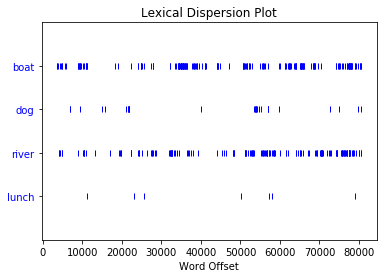

In [24]:
import matplotlib
%matplotlib inline 

textList.dispersion_plot(["boat", "dog", "river", "lunch"])

#### By default tokenization includes all surrounting punctuation charachters

In [25]:
len(textList)

81185

#### We can invoke RegexpTokenizer to eliminate punctuation

In [26]:
#This will match any word characters until it reaches a non-word character, like a space
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(bk_3boat)

len(tokens)

68364

#### Measuring lexical diversity: dividing unique words by overall words

We can use lexical diversity as a measure to help understand type of text usage. Example would be identifying plagiarism between texts.

In [28]:
len(set(textList)) / len(textList)*100

9.222146948327893

### Normalization

* Need to "normalize" terms
 * Information Reterival: indexed text & query terms must have same form.<br>
 We want to match __U.S.A.__ and __USA__
* We implicitly define equivalence classes of terms
 * e.eg., deleting periods in a term
* Alternative: asymmetric explansion:
 * Enter: __window__ Search: __window, windows__
 * Enter __windows__ Search: __Windows, windows, window__
 * Enter: __Windows__ Search: __Windows__
 
The symmetric expansion is going to give us a huge explosion of data.<br>
Versus bringing words to the most common word forum will give us the fastest possible results because we'll be simplifying the words, but there is a little bit of a trade off.

Example: __windows__ and __Windows__ might mean, __window__(present in a house or shelter) and __Windows__ which is the operating system.<br>
So depending depending on the use case, the semantic expansion can be more powerful, but it requires a lot more data storage.

### Case folding
* Applications like Information Retrival: reduce all letters to lower case
 * Since users end to use lower case
 * Possible exception: upper case in mid-sentence?
   - e.g. __General Motors__
   - __Fed__ vs __fed__
   - __SAIL__ vs __sail__
* For sentiment analysis, Information Retrival
 * Case us helpful __US__ versus __us__ is important
 
The other thing is very critical about case folding his name name recognition

## Text normalization with stemming and lemmatization

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

    am, are, is =>  be
    dog, dogs, dog's, dogs' => dog

The result of this mapping of text will be something like:

    the girl's dogs are different breeds => the girl dog be differ breed 
    
__Lemmatization__: have to find correct dictionary headword form

### Morphemes:
* The small meaningful units that make up words
* Stems: The core meaning-bearing units
* Affixes: Bits and pieces that adhere to stems
 * Often with grammatical functions
 
The idea is that every word contains a stem and stem is the core mean bearing unit in each word. So if we chop the suffixes enough excess of each word we can get back to the stem.

### Stemming
* Reduce terms to their stems in information retrieval
* Stemming is crude chopping of affixes
 * language dependent
 * e.g., __automate(s), autmatic,automation__ all reduced to __automat__

There are two major words stemming algorithms
1. Porter's algorithm
2. Lancaster algorithm

This algorithm has 2 steps to it:

Step 1a<br>
sses $\to$ ss   caresses$\to$caress<br>
les $\to$ i     ponies$\to$poni<br>
ss $\to$ ss     caress$\to$caress<br>
s $\to$ (blank) cats$\to$cat<br>

Step 1b<br>
Verbs<br>
(*v*)ing $\to$ (blank) walking $\to$ walk<br>
(*v*)ed $\to$ (blank) plastered $\to$ plaster

Step 2 (for long stems)<br>
ational $\to$ ate relational $\to$ relate<br>
izer $\to$ ize digitizer $\to$ digitize<br>
ator $\to$ ate operator $\to$ operate<br>

Step 3(for longer stems)<br>
al $\to$ (blank) revival $\to$ reviv<br>
able $\to$ (blank) adjustable $\to$ adjust<br>
ate $\to$ (blank) activate $\to$ activ<br>

In [29]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

#### Converting lists to strings to simplify displaying / visualization

In [31]:
words_l = (words_lc[0:50])
words_s = ', '.join(words_l)

#### Original tokens

In [32]:
print (words_l)

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us']


#### Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

In [36]:
#Porters stemming

print([porter.stem(t) for t in words_lc[0:50]])

['three', 'men', 'boat', 'say', 'noth', 'dog', 'three', 'men', 'boat', 'jerom', 'jerom', 'chapter', 'three', 'invalid', 'suffer', 'georg', 'harri', 'victim', 'one', 'hundr', 'seven', 'fatal', 'maladi', 'use', 'prescript', 'cure', 'liver', 'complaint', 'children', 'agre', 'overwork', 'need', 'rest', 'week', 'roll', 'deep', 'georg', 'suggest', 'river', 'montmor', 'lodg', 'object', 'origin', 'motion', 'carri', 'major', 'three', 'one', 'four', 'us']


In [37]:
#lancaster stemming

print([lancaster.stem(t) for t in words_lc[0:50]])

['three', 'men', 'boat', 'say', 'noth', 'dog', 'three', 'men', 'boat', 'jerom', 'jerom', 'chapt', 'three', 'invalid', 'suff', 'georg', 'har', 'victim', 'on', 'hundr', 'sev', 'fat', 'malady', 'us', 'prescrib', 'cur', 'liv', 'complaint', 'childr', 'agr', 'overwork', 'nee', 'rest', 'week', 'rol', 'deep', 'georg', 'suggest', 'riv', 'montm', 'lodg', 'object', 'origin', 'mot', 'carry', 'maj', 'three', 'on', 'four', 'us']


##### As stemming removed a lot of meaning from many words eg. george became georg, we will try a new method

### Lemmatization
#### Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. The dictionary checking makes lemmatizers significantly slower than stemmers

In [38]:
print (words_l)

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us']


In [39]:
wnl = nltk.WordNetLemmatizer()

In [42]:
print([wnl.lemmatize(t) for t in words_lc[0:50]])

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalid', 'suffering', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'malady', 'useful', 'prescription', 'cure', 'liver', 'complaint', 'child', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodge', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'u']


#### As WordNetLemmatizer compares each word against a dictionary it is relatively slower than the simple porter and lancaster stemming hence its based on use case which one we want to use eg. for 10,000 records we can use Wordnet but for 500 million tweets we should use simple lemmatization

## Part of Speech Tagging

Parts of speech tagging is important in NLP because we can use them in the following applications:
* Text-to-Speech (how do we pronounce "lead"?)
* Can write regexps like (Det)Adj* N+ over the output phrases, etc
* As inout to or to speed up a full parser
* If you know the tag, we can back off to it in other tasks

POS tag list:<br>
<br>
CC coordinating conjunction<br>
CD cardinal digit<br>
DT determiner<br>
EX existential there (like: "there is" ... think of it like "there exists")<br>
FW foreign word<br>
IN preposition/subordinating conjunction<br>
JJ adjective 'big'<br>
JJR adjective, comparative 'bigger'<br>
JJS adjective, superlative 'biggest'<br>
LS list marker 1)<br>
MD modal could, will<br>
NN noun, singular 'desk'<br>
NNS noun plural 'desks'<br>
NNP proper noun, singular 'Harrison'<br>
NNPS proper noun, plural 'Americans'<br>
PDT predeterminer 'all the kids'<br>
POS possessive ending parent's<br>
PRP personal pronoun I, he, she<br>
PRP possessive pronoun my, his, hers<br>
RB adverb very, silently,<br>
RBR adverb, comparative better<br>
RBS adverb, superlative best<br>
RP particle give up<br>
TO to go 'to' the store.<br>
UH interjection errrrrrrrm<br>
VB verb, base form take<br>
VBD verb, past tense took<br>
VBG verb, gerund/present participle taking<br>
VBN verb, past participle taken<br>
VBP verb, sing. present, non-3d take<br>
VBZ verb, 3rd person sing. present takes<br>
WDT wh-determiner which<br>
WP wh-pronoun who, what<br>
WP possessive wh-pronoun whose<br>
WRB wh-abverb where, when<br>

#### Can use help function to get explanations of endividual tags

In [43]:
uc1 = "The University of Chicago is a private research university in Chicago, Illinois"
uc2 = "It is one of the world's leading and most influential institutions of higher learning, with top-ten positions in numerous rankings and measures"

In [46]:
text = nltk.tokenize.word_tokenize(uc1)
nltk.pos_tag(text)

[('The', 'DT'),
 ('University', 'NNP'),
 ('of', 'IN'),
 ('Chicago', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('private', 'JJ'),
 ('research', 'NN'),
 ('university', 'NN'),
 ('in', 'IN'),
 ('Chicago', 'NNP'),
 (',', ','),
 ('Illinois', 'NNP')]

In [47]:
text = nltk.tokenize.word_tokenize(uc2)
nltk.pos_tag(text)

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ("'s", 'POS'),
 ('leading', 'JJ'),
 ('and', 'CC'),
 ('most', 'JJS'),
 ('influential', 'JJ'),
 ('institutions', 'NNS'),
 ('of', 'IN'),
 ('higher', 'JJR'),
 ('learning', 'NN'),
 (',', ','),
 ('with', 'IN'),
 ('top-ten', 'JJ'),
 ('positions', 'NNS'),
 ('in', 'IN'),
 ('numerous', 'JJ'),
 ('rankings', 'NNS'),
 ('and', 'CC'),
 ('measures', 'NNS')]

## Reading from URL
#### BeautifulSoup to clean up meta-tags 

In [54]:
url = "https://en.wikipedia.org/wiki/Harvard_University"

# wget -E  -k -p https://en.wikipedia.org/wiki/University_of_Chicago
#url_saved = '/project/msca/kadochnikov/wiki/en.wikipedia.org/wiki/University_of_Chicago.html'

from bs4 import BeautifulSoup
import urllib.request
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page.read(), "lxml")

#with open(url_saved, 'rb') as html:
#    soup = BeautifulSoup(html, "lxml")

In [55]:
uc_wiki = (soup.get_text())
#print (type(uc_wiki))
print (uc_wiki[6910:9000]) 

on, he was motivated not by a desire to secularize education but by Transcendentalist Unitarian convictions influenced by William Ellery Channing and Ralph Waldo Emerson.[29]

20th century
 Richard Rummell's 1906 watercolor landscape view, facing northeast.[30]
In the 20th century, Harvard's reputation grew as a burgeoning endowment and prominent professors expanded the university's scope. Rapid enrollment growth continued as new graduate schools were begun and the undergraduate college expanded. Radcliffe College, established in 1879 as the female counterpart of Harvard College, became one of the most prominent schools for women in the United States. Harvard became a founding member of the Association of American Universities in 1900.[10]
The student body in the early decades of the century was predominantly "old-stock, high-status Protestants, especially Episcopalians, Congregationalists, and Presbyterians." A 1923 proposal by President A. Lawrence Lowell that Jews be limited to 15% 

#### Even after BeautifulSoup we are left with a lot of garbade - mostly punctuation

In [56]:
uc_wiki_tokens = nltk.tokenize.word_tokenize(uc_wiki)
uc_wiki_tokens_uncleaned = uc_wiki_tokens
print (uc_wiki_tokens[2000:2100])

["'s", 'expansion', 'in', 'Allston', ',', 'Massachusetts', 'Harvard', 'Business', 'School', ',', 'Harvard', 'Innovation', 'Labs', ',', 'and', 'many', 'athletics', 'facilities', ',', 'including', 'Harvard', 'Stadium', ',', 'are', 'located', 'on', 'a', '358-acre', '(', '145', 'ha', ')', 'campus', 'in', 'Allston', ',', '[', '48', ']', 'a', 'Boston', 'neighborhood', 'just', 'across', 'the', 'Charles', 'River', 'from', 'the', 'Cambridge', 'campus', '.', 'The', 'John', 'W.', 'Weeks', 'Bridge', ',', 'a', 'pedestrian', 'bridge', 'over', 'the', 'Charles', 'River', ',', 'connects', 'the', 'two', 'campuses', '.', 'The', 'university', 'is', 'actively', 'expanding', 'into', 'Allston', ',', 'where', 'it', 'now', 'owns', 'more', 'land', 'than', 'in', 'Cambridge', '.', '[', '49', ']', 'Plans', 'include', 'new', 'construction', 'and', 'renovation', 'for', 'the']


#### Exercise

Write a simple code to clean data of the scraped text.

You will need to create:

1. stopwords - using nltk corpus
2. uc_wiki_tokens - remove single-character tokens and punctuation
3. uc_wiki_tokens_no_stopwords - Remove stopwords
4. fdist - run function __FreqDist__ on uc_wiki_tokens_no_stopwords

In [ ]:
# write your code below

### Solution

In [57]:
#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
uc_wiki_tokens = [word for word in uc_wiki_tokens if len(word) > 1]

# Remove punctuation
uc_wiki_tokens = [word for word in uc_wiki_tokens if word.isalpha()]

# Remove stopwords
uc_wiki_tokens_no_stopwords = [word for word in uc_wiki_tokens if word not in stopwords]

fdist = nltk.FreqDist(uc_wiki_tokens_no_stopwords)

fdist.most_common(10)

[('Harvard', 336),
 ('University', 108),
 ('The', 106),
 ('Retrieved', 101),
 ('College', 84),
 ('Boston', 52),
 ('September', 51),
 ('School', 35),
 ('John', 34),
 ('New', 31)]

Notice how __The__ made it to the list even though stop words were removed. This is because __The__ starts with a captial T which makes it a proper noun. We can fix this by lower casing the tokens but then we would lose out on our POS taggin of proper nouns

### Comparing the results of our cleaned web scrape

#### Cleanest version with all noise and stopwords removed

In [58]:
uc_wiki_text_no_stopwords = nltk.Text(uc_wiki_tokens_no_stopwords)
print (uc_wiki_text_no_stopwords[:100])

['Harvard', 'University', 'Wikipedia', 'Harvard', 'University', 'From', 'Wikipedia', 'free', 'encyclopedia', 'Jump', 'navigation', 'Jump', 'search', 'Private', 'research', 'university', 'Cambridge', 'Massachusetts', 'United', 'States', 'Harvard', 'redirects', 'For', 'uses', 'see', 'Harvard', 'disambiguation', 'It', 'suggested', 'Harvard', 'University', 'Health', 'Services', 'merged', 'article', 'Discuss', 'Proposed', 'since', 'September', 'Harvard', 'UniversityCoat', 'armsLatin', 'Universitas', 'HarvardianaFormer', 'namesHarvard', 'CollegeMottoVeritas', 'Latin', 'Motto', 'years', 'ago', 'Endowment', 'billion', 'PresidentLawrence', 'BacowAcademic', 'faculty', 'members', 'academic', 'appointments', 'affiliated', 'teaching', 'hospitals', 'Fall', 'Fall', 'Fall', 'LocationCambridge', 'Massachusetts', 'United', 'acres', 'ha', 'NewspaperThe', 'Harvard', 'CrimsonColors', 'Crimson', 'AthleticsNCAA', 'Division', 'Ivy', 'LeagueNicknameHarvard', 'Harvard', 'University', 'private', 'Ivy', 'League',

#### Modest cleaning - only punctuation and noise - all stopwords left intact

In [59]:
uc_wiki_text_cleaned = nltk.Text(uc_wiki_tokens)
print (uc_wiki_text_cleaned[:100])

['Harvard', 'University', 'Wikipedia', 'Harvard', 'University', 'From', 'Wikipedia', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Private', 'research', 'university', 'in', 'Cambridge', 'Massachusetts', 'United', 'States', 'Harvard', 'redirects', 'here', 'For', 'other', 'uses', 'see', 'Harvard', 'disambiguation', 'It', 'has', 'been', 'suggested', 'that', 'Harvard', 'University', 'Health', 'Services', 'be', 'merged', 'into', 'this', 'article', 'Discuss', 'Proposed', 'since', 'September', 'Harvard', 'UniversityCoat', 'of', 'armsLatin', 'Universitas', 'HarvardianaFormer', 'namesHarvard', 'CollegeMottoVeritas', 'Latin', 'Motto', 'in', 'years', 'ago', 'Endowment', 'billion', 'PresidentLawrence', 'BacowAcademic', 'faculty', 'members', 'and', 'academic', 'appointments', 'in', 'affiliated', 'teaching', 'hospitals', 'Fall', 'Fall', 'Fall', 'LocationCambridge', 'Massachusetts', 'United', 'acres', 'ha', 'NewspaperThe', 'Harvard', 'CrimsonColors', 'Crimson', '

#### No cleaning done

In [60]:
uc_wiki_text_raw = nltk.Text(uc_wiki_tokens_uncleaned)
print (uc_wiki_text_raw[:100])

['Harvard', 'University', '-', 'Wikipedia', 'Harvard', 'University', 'From', 'Wikipedia', ',', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Private', 'research', 'university', 'in', 'Cambridge', ',', 'Massachusetts', ',', 'United', 'States', "''", 'Harvard', "''", 'redirects', 'here', '.', 'For', 'other', 'uses', ',', 'see', 'Harvard', '(', 'disambiguation', ')', '.', 'It', 'has', 'been', 'suggested', 'that', 'Harvard', 'University', 'Health', 'Services', 'be', 'merged', 'into', 'this', 'article', '.', '(', 'Discuss', ')', 'Proposed', 'since', 'September', '2020', '.', 'Harvard', 'UniversityCoat', 'of', 'armsLatin', ':', 'Universitas', 'HarvardianaFormer', 'namesHarvard', 'CollegeMottoVeritas', '(', 'Latin', ')', '[', '1', ']', 'Motto', 'in', 'EnglishTruthTypePrivateEstablished1636', ';', '384', 'years', 'ago', '(', '1636', ')', '[', '2', ']', 'Endowment', '$', '41.9', 'billion', '(']


### Applying simlarity function - which option produces best results?

#### Exercise

Write a simple code to run similar function on:
1. uc_wiki_text_no_stopwords
2. uc_wiki_text_cleaned
3. uc_wiki_text_raw


In [ ]:
# write your code below

### Solution

#### Cleanest version with all noise and stopwords removed

In [61]:
uc_wiki_text_no_stopwords.similar('university')

college gazette harvard crimson graduate cambridge among modern
universities students reputation report hall square collection
shanghai board number subject spot


#### Modest cleaning - only punctuation and noise - all stopwords left intact

In [62]:
uc_wiki_text_cleaned.similar('university')

harvard college gazette endowment crimson as graduate center number to
has of faculty and academic division is among world founding


#### No cleaning done

In [63]:
uc_wiki_text_raw.similar('university')

harvard college gazette endowment crimson graduate center number to
has of faculty and academic division is among world founding as


#### Seems that no cleaning provided us with the best result. That is because we remove a lot of context based tokens when we clean aggresively.

In this case, what we see are the two critical pieces. If we prepare something for human consumption. If we want to summarize the text and presented for our customers or for executives to read. We perform the the most aggressive cleanup.

If we prepare the text as the features for machine learning or any automated algorithms like supervised models built on NLP, we cannot afford to do any cleanups at all, or we mess up the context and the models do not work as intended.

### Tagging our web page with POS

#### In order for the tagger to be effective, it has to tag each word based on the word itself, as well as its context within a sentence. 
Depending on your corpus, certain taggers perform better the others.  Like with SPSS TA dictionaries, you can start with pre-trained POS Tagger and then try multiple different options to see which one will perform best for you.
You can also customize and train your own taggers to match your particular corpus

In [65]:
uc_wiki_tagged = nltk.pos_tag(uc_wiki_text_cleaned)

In [66]:
uc_wiki_tagged[:10]

[('Harvard', 'NNP'),
 ('University', 'NNP'),
 ('Wikipedia', 'NNP'),
 ('Harvard', 'NNP'),
 ('University', 'NNP'),
 ('From', 'NNP'),
 ('Wikipedia', 'NNP'),
 ('the', 'DT'),
 ('free', 'JJ'),
 ('encyclopedia', 'NN')]

## Exploring alternative text analysis packages: TextBlob

In [67]:
from textblob import TextBlob

In [68]:
blob = TextBlob(uc_wiki)

#### Part of speech tagging

In [70]:
blob.tags[200:220]

[(']', 'VBD'),
 ('The', 'DT'),
 ('Massachusetts', 'NNP'),
 ('colonial', 'JJ'),
 ('legislature', 'NN'),
 ('the', 'DT'),
 ('General', 'NNP'),
 ('Court', 'NNP'),
 ('authorized', 'VBD'),
 ('Harvard', 'NNP'),
 ("'s", 'POS'),
 ('founding', 'NN'),
 ('In', 'IN'),
 ('its', 'PRP$'),
 ('early', 'JJ'),
 ('years', 'NNS'),
 ('Harvard', 'NNP'),
 ('College', 'NNP'),
 ('primarily', 'RB'),
 ('trained', 'VBD')]

#### To process  cleaned-up version from NLTK we will have to convert text from nltk.text.Text to String

In [71]:
words_list = (uc_wiki_text_cleaned[0:])
words_string = ', '.join(words)
print(type(words_list))
print(type(words_string))

<class 'list'>
<class 'str'>


In [72]:
blob = TextBlob(words_string)

#### POS Tagging with TextBlob

In [73]:
blob.tags[70:90]

[('TO', 'NNP'),
 ('ONE', 'NNP'),
 ('THERE', 'NNP'),
 ('were', 'VBD'),
 ('four', 'CD'),
 ('of', 'IN'),
 ('us', 'PRP'),
 ('George', 'NNP'),
 ('and', 'CC'),
 ('William', 'NNP'),
 ('Samuel', 'NNP'),
 ('Harris', 'NNP'),
 ('and', 'CC'),
 ('myself', 'PRP'),
 ('and', 'CC'),
 ('Montmorency', 'NNP'),
 ('We', 'PRP'),
 ('were', 'VBD'),
 ('sitting', 'VBG'),
 ('in', 'IN')]

In [74]:
words = nltk.tokenize.word_tokenize(bk_3boat)
words_string = ', '.join(words)
blob = TextBlob(words_string)

blob.tags[80:100]

[('four', 'CD'),
 ('of', 'IN'),
 ('us', 'PRP'),
 ('George', 'NNP'),
 ('and', 'CC'),
 ('William', 'NNP'),
 ('Samuel', 'NNP'),
 ('Harris', 'NNP'),
 ('and', 'CC'),
 ('myself', 'PRP'),
 ('and', 'CC'),
 ('Montmorency', 'NNP'),
 ('We', 'PRP'),
 ('were', 'VBD'),
 ('sitting', 'VBG'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('room', 'NN'),
 ('smoking', 'NN'),
 ('and', 'CC')]

#### Tripping on the capitalized header of the book

In [75]:
blob.tags[:10]

[('THREE', 'CD'),
 ('MEN', 'NNP'),
 ('IN', 'NNP'),
 ('A', 'NNP'),
 ('BOAT', 'NNP'),
 ('TO', 'NNP'),
 ('SAY', 'NNP'),
 ('NOTHING', 'NNP'),
 ('OF', 'NNP'),
 ('THE', 'NNP')]

We see that because of capitilization on the name of the book the POS tagger confused it for proper nouns

#### Extracting Nouns

In [78]:
blob.noun_phrases[:50]

WordList(['three', 'men', 'in', 'boat', 'to', 'say', 'nothing', 'of', 'the', 'dog', 'men', 'boat', 'jerome', 'k.', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'of', 'george', 'and', 'harris', 'victim', 'to', 'one', 'hundred', 'and', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'for', 'liver', 'complaint', 'in', 'children', 'we', 'agree', 'that', 'we', 'are', 'overworked', 'and', 'need', 'rest', 'week', 'on'])

Why do we get about nouns and proper nouns in a text is because that's usually truly shows us the subjects and objects of the text. So you can quickly just get rid of everything else.So if we just look at the top 50 nouns in a text as a given us some information about the text.

#### We also have embedded functions to pluralize and singularize the words 

In [79]:
s1 = TextBlob(words_s)

In [80]:
print(words_l[:1000])

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us']


In [81]:
s1.words[:100].singularize()

WordList(['three', 'man', 'boat', 'say', 'nothing', 'dog', 'three', 'man', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalid', 'suffering', 'george', 'harri', 'victim', 'one', 'hundred', 'seven', 'fatal', 'malady', 'useful', 'prescription', 'cure', 'liver', 'complaint', 'child', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggest', 'river', 'montmorency', 'lodge', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'fmy', 'u'])

In [82]:
print(words_l[:1000])

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us']


In [83]:
s1.words[0:100].pluralize()

WordList(['threes', 'mens', 'boats', 'says', 'nothings', 'dogs', 'threes', 'mens', 'boats', 'jeromes', 'jeromes', 'chapters', 'threes', 'invalidss', 'sufferingss', 'georges', 'harriss', 'victims', 'ones', 'hundreds', 'sevens', 'fatals', 'maladiess', 'usefuls', 'prescriptionss', 'cures', 'livers', 'complaints', 'childrens', 'agrees', 'overworkeds', 'needs', 'rests', 'weeks', 'rollings', 'deeps', 'georges', 'suggestss', 'rivers', 'montmorencies', 'lodgess', 'objections', 'originals', 'motions', 'carrieds', 'majorities', 'threes', 'ones', 'fours', 'uss'])

#### Pluralize and singularize do not do a good job using the NLTK implimentation hence should be avoided most of the times

### Split to words

In [84]:
blob_wiki = TextBlob(uc_wiki)
b_words = blob_wiki.words
print (b_words[1020:1080])

['29', '20th', 'century', 'Richard', 'Rummell', "'s", '1906', 'watercolor', 'landscape', 'view', 'facing', 'northeast', '30', 'In', 'the', '20th', 'century', 'Harvard', "'s", 'reputation', 'grew', 'as', 'a', 'burgeoning', 'endowment', 'and', 'prominent', 'professors', 'expanded', 'the', 'university', "'s", 'scope', 'Rapid', 'enrollment', 'growth', 'continued', 'as', 'new', 'graduate', 'schools', 'were', 'begun', 'and', 'the', 'undergraduate', 'college', 'expanded', 'Radcliffe', 'College', 'established', 'in', '1879', 'as', 'the', 'female', 'counterpart', 'of', 'Harvard', 'College']


In [85]:
blob_custom = TextBlob('The class 1.1.3 is almost over!!!  Time to go party now.')
b_words = blob_custom.words
print (b_words)

['The', 'class', '1.1.3', 'is', 'almost', 'over', 'Time', 'to', 'go', 'party', 'now']


### Split to sentences

In [86]:
b_sentences = blob_wiki.sentences
print (b_sentences[10:15])

[Sentence("[10] James B. Conant led the university through the Great Depression and World War II; he liberalized admissions after the war."), Sentence("The university is composed of ten academic faculties plus the Radcliffe Institute for Advanced Study."), Sentence("Arts and Sciences offers study in a wide range of academic disciplines for undergraduates and for graduates, while the other faculties offer only graduate degrees, mostly professional."), Sentence("Harvard has three main campuses:[11]
the 209-acre (85 ha) Cambridge campus centered on Harvard Yard; an adjoining campus immediately across the Charles River in the Allston neighborhood of Boston; and the medical campus in Boston's Longwood Medical Area."), Sentence("[12] Harvard's endowment is valued at $41.9 billion, making it the largest of any academic institution.")]


In [87]:
blob_custom = TextBlob('''The class 1, 2, etc. are almost over!!!  Time to go to Dr. Yuri's party 1.2. now.''')
b_sentences = blob_custom.sentences
print (b_sentences)

[Sentence("The class 1, 2, etc."), Sentence("are almost over!!!"), Sentence("Time to go to Dr. Yuri's party 1.2. now.")]


### These methods are also useful to understand the context of the text